## Machine Learning Tutorial Python - 10 Support Vector Machine (SVM)

classification algo


In [247]:
import pandas as pd
from sklearn.datasets import load_iris

iris_data = load_iris()
dir(iris_data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [248]:
target = pd.Series(iris_data.target)
target = target.map(lambda x: iris_data.target_names[x])
target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Length: 150, dtype: object

In [249]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [250]:
df = pd.DataFrame(iris_data.data)
df.columns = iris_data.feature_names
df["target"] = target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


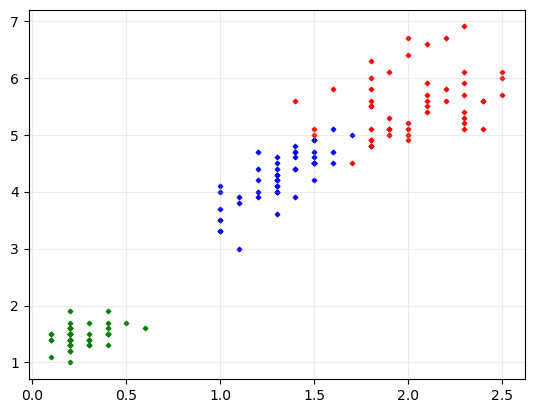

In [251]:
import matplotlib.pyplot as plt

size = 5
mark = "D"

plt.scatter(
    df.loc[df.target == "setosa"]["petal width (cm)"],
    df.loc[df.target == "setosa"]["petal length (cm)"],
    c="g",
    marker=mark,
    s=size,
)
plt.scatter(
    df.loc[df.target == "versicolor"]["petal width (cm)"],
    df.loc[df.target == "versicolor"]["petal length (cm)"],
    c="b",
    marker=mark,
    s=size,
)
plt.scatter(
    df.loc[df.target == "virginica"]["petal width (cm)"],
    df.loc[df.target == "virginica"]["petal length (cm)"],
    c="r",
    marker=mark,
    s=size,
)
plt.grid(alpha=0.25)

- want to make line that separates the data with highest margin (distance away from support data/vectors)
- use support vector machine to do so
- separator: 2D = line, 3D = plane, nD = hyper-plane


## gamma

- highest gamma considers only closest data
  - creates more wiggly line (more accurate)
- lowest gamma considers all data
  - more linear (more computationally effecient)


## regularization (C)

- highest regularization like gerrymandering (but no error)
- lowest regularization is linear (but min error)


## tough set

ex: one data circles the other

- create 3D with z = x^2 + y^2 (z is transformation kernal)
- then view as x vs z (y coming straight out)


---
# Tutorial
---


In [252]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [253]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [254]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [255]:
df["target"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [256]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [257]:
# .apply() is more versatile than map
df["flower name"] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


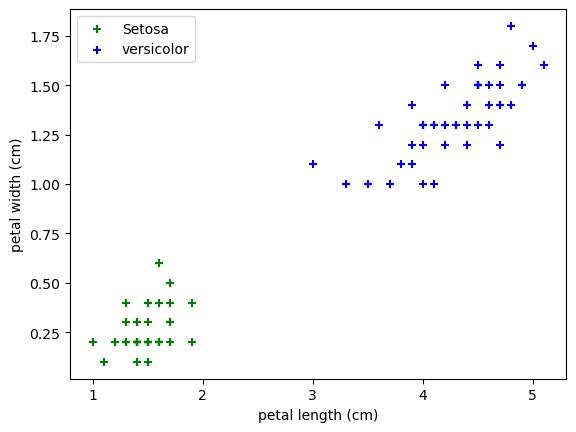

In [ ]:
import matplotlib.pyplot as plt

df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.scatter(
    df0["petal length (cm)"], df0["petal width (cm)"], c="g", marker="+", label="Setosa"
)
plt.scatter(
    df1["petal length (cm)"],
    df1["petal width (cm)"],
    c="b",
    marker="+",
    label="versicolor",
)
# plt.scatter(df2["petal length (cm)"], df2["petal width (cm)"], c="r", marker="+")

plt.legend()

In [259]:
from sklearn.model_selection import train_test_split

# axis="columns" means "i want to drop these columns"
X = df.drop(["target", "flower name"], axis="columns")
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
from sklearn.svm import SVC  # Support Vector Classification

model = SVC(C=10, gamma=1, kernel="linear")  # C = regularization
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9333333333333333